# Description of data and research intention

### Data:
During the time period from the 6th of December 2021 up to the 19th of May 2022, I was summarizing the data about my own body mass, walking activity as well as ingestion of carbohydrates, fats and proteins per day. 

The features that were observed are listed here as follows:
* <b>body mass: </b>body mass was measured each morning immediately after getting up

* <b>number of steps, distance in km, calories burned by walking : </b>measured through smartphone's built-in accelerometer e.g. smartphone app

* <b>estimated index for carbohydrates, fats and proteins: </b><br>
0 - no food items of such kind ingested this day<br>
1 - optimal quantity of food items of such kind in a day (Attention: This is my personal estimation!)<br>
2 - quantity of food items of such kind two times bigger as optimal (Attention: This is my personal estimation!)<br>
3 - quantity of food items of such kind three times bigger as optimal (Attention: This is my personal estimation!)<br>

### Research intention:
* to investigate analytically the dependence of body mass on walking activity and the type and kind of nutrition
* to develop a machine learning model that predicts a body mass change based on walking activity and nutrition in the preceding days

## Data Analysis

In [1]:
# Import Statements (Python modules) for Data Analysis

import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Data loading
df = pd.read_csv('data/Data_collected_BodyMass_vs_Activity_Nutrition.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       165 non-null    object 
 1   body_mass                  151 non-null    object 
 2   walking_steps              165 non-null    int64  
 3   walking_km                 165 non-null    object 
 4   walking_kcal               165 non-null    int64  
 5   carbs_index_estimation     162 non-null    float64
 6   fats_index_estimation      162 non-null    float64
 7   proteins_index_estimation  162 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 10.4+ KB


In [4]:
df.head()

,date,body_mass,walking_steps,walking_km,walking_kcal,carbs_index_estimation,fats_index_estimation,proteins_index_estimation
0,06.12.21,"66,5",2560,"1,99",83,3.0,1.0,1.0
1,07.12.21,NaN,1069,"0,85",34,3.0,1.0,1.0
2,08.12.21,"66,6",7193,"5,68",220,1.0,2.0,1.0
3,09.12.21,"65,5",589,"0,46",19,2.0,1.0,0.0
4,10.12.21,"64,7",7216,"5,68",222,1.0,1.0,1.0


In [5]:
# Conversion dtypes - 'date' -> DateTime, 'body_mass', 'walking_km' -> converting to numerical values
# Conversion int columns to floats
# Set date to index for further analysis

df['date'] = pd.to_datetime(df['date'], format="%d.%m.%y")

df['body_mass'] = pd.to_numeric(df['body_mass'].str.replace(',', '.'))
df['walking_km'] = pd.to_numeric(df['walking_km'].str.replace(',', '.'))

df[['walking_steps', 'walking_kcal']] = df[['walking_steps', 'walking_kcal']].astype('float64')

df = df.set_index('date')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2021-12-06 to 2022-05-19
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   body_mass                  151 non-null    float64
 1   walking_steps              165 non-null    float64
 2   walking_km                 165 non-null    float64
 3   walking_kcal               165 non-null    float64
 4   carbs_index_estimation     162 non-null    float64
 5   fats_index_estimation      162 non-null    float64
 6   proteins_index_estimation  162 non-null    float64
dtypes: float64(7)
memory usage: 10.3 KB


#### ATTENTION: There are empty (NaN values in the dataset for body mass and index estimations). I forgot to fill in the data on some days 🙂.
Now the decision has to be made how to handle these empty values. They can't be deleted, because they are bound to the time series! They can't be neither set to zero.


## Missing values analysis

In [7]:
# Function definition for formatting the figure and x-axis
months = mdates.MonthLocator()
days = mdates.DayLocator(interval=7)
months_fmt = mdates.DateFormatter("%Y-%m")

def create_figure(fig_width, fig_height, title, xlabel, ylabel, color):
    '''Takes in a width and height for the figure, as well as title, xlabel and ylabel of the data to plot. Returns figure'''
    plt.figure(figsize = (fig_width, fig_height))
    plt.grid(color='grey', linestyle='--')
    plt.title(title, fontsize = 18, color=color)
    
    plt.xticks(fontsize=12, rotation=0)
    plt.yticks(fontsize=12, rotation=0)
    
    ax1 = plt.gca()
    ax1.xaxis.set_major_locator(months)
    ax1.xaxis.set_major_formatter(months_fmt)
    ax1.xaxis.set_minor_locator(days)
    
    ax1.set_xlabel(xlabel, fontsize=14, color=color)
    ax1.set_ylabel(ylabel, fontsize=14, color=color)


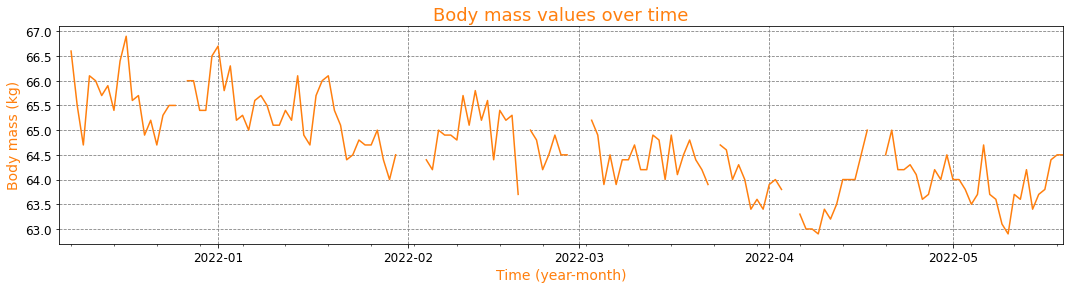

In [8]:
# Plotting body mass data

create_figure(18, 4, "Body mass values over time", "Time (year-month)", "Body mass (kg)", "C1")
plt.xlim([df.index.min(), df.index.max()])
plt.plot(df['body_mass'], color="C1")
plt.show()

<b>As it can be seen from the graphic above and assuming body mass doesn't tend to change tremendously from day to day e.g. the behaviour of change is linear, the linear interpolation will be used to fill in the missing body mass data</b>

In [9]:
df['body_mass']=df['body_mass'].interpolate(method='linear')

1.0    75
2.0    70
3.0    17
Name: carbs_index_estimation, dtype: int64


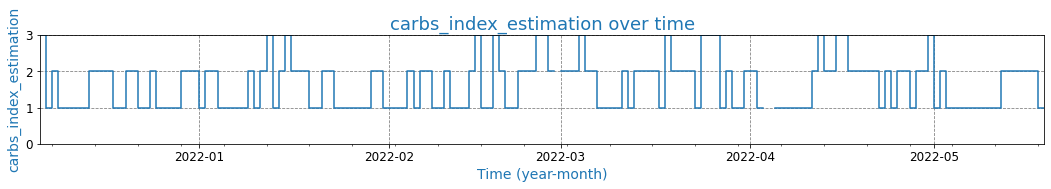

1.0    131
2.0     26
0.0      4
3.0      1
Name: fats_index_estimation, dtype: int64


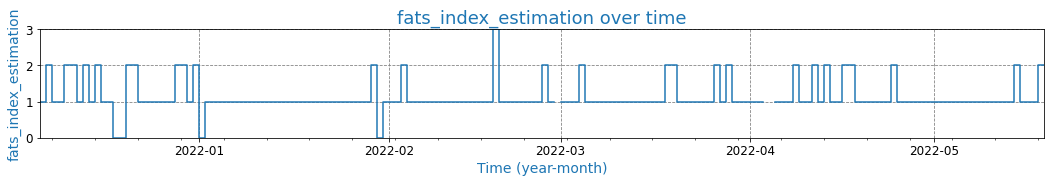

1.0    109
2.0     44
0.0      5
3.0      4
Name: proteins_index_estimation, dtype: int64


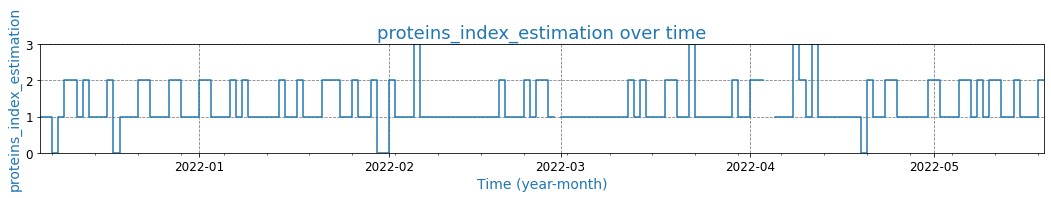

In [10]:
# Plotting index estimation data

df_estimation_index = df.drop(df.iloc[:, 0:4], inplace = False, axis = 1)
col_names_estimation_index = df_estimation_index.columns

for i in range(3):
    print(df_estimation_index[col_names_estimation_index[i]].value_counts())
    title = f"{col_names_estimation_index[i]} over time"
    create_figure(18, 2, title, "Time (year-month)", col_names_estimation_index[i], "C0")
    plt.xlim([df.index.min(), df.index.max()])
    plt.ylim([0, 3])
    plt.step(df.index, df_estimation_index[col_names_estimation_index[i]], color="C0")
    plt.show()

<b>As it can be seen from the graphics and the results of value_counts method the value 1 dominates as estimation index for fats and proteins, but has also maximum counts for carbohydrates. Therefore the 3 missing values per feature respectivly will be filled in with the value 1.</b>

In [11]:
df[col_names_estimation_index] = df[col_names_estimation_index].fillna(value=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2021-12-06 to 2022-05-19
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   body_mass                  165 non-null    float64
 1   walking_steps              165 non-null    float64
 2   walking_km                 165 non-null    float64
 3   walking_kcal               165 non-null    float64
 4   carbs_index_estimation     165 non-null    float64
 5   fats_index_estimation      165 non-null    float64
 6   proteins_index_estimation  165 non-null    float64
dtypes: float64(7)
memory usage: 10.3 KB


## Descriptive Statistics

In [13]:
df.describe()

,body_mass,walking_steps,walking_km,walking_kcal,carbs_index_estimation,fats_index_estimation,proteins_index_estimation
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,64.675758,4045.503030,3.169576,150.218182,1.630303,1.145455,1.284848
std,0.855943,2972.964351,2.324179,112.963737,0.664650,0.431313,0.560988
min,62.900000,22.000000,0.010000,0.000000,1.000000,0.000000,0.000000
25%,64.000000,1301.000000,1.040000,44.000000,1.000000,1.000000,1.000000
50%,64.600000,4247.000000,3.350000,144.000000,2.000000,1.000000,1.000000
75%,65.200000,6419.000000,5.150000,227.000000,2.000000,1.000000,2.000000
max,66.900000,12402.000000,9.620000,434.000000,3.000000,3.000000,3.000000


<ipython-input-14-a0d949341e03>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


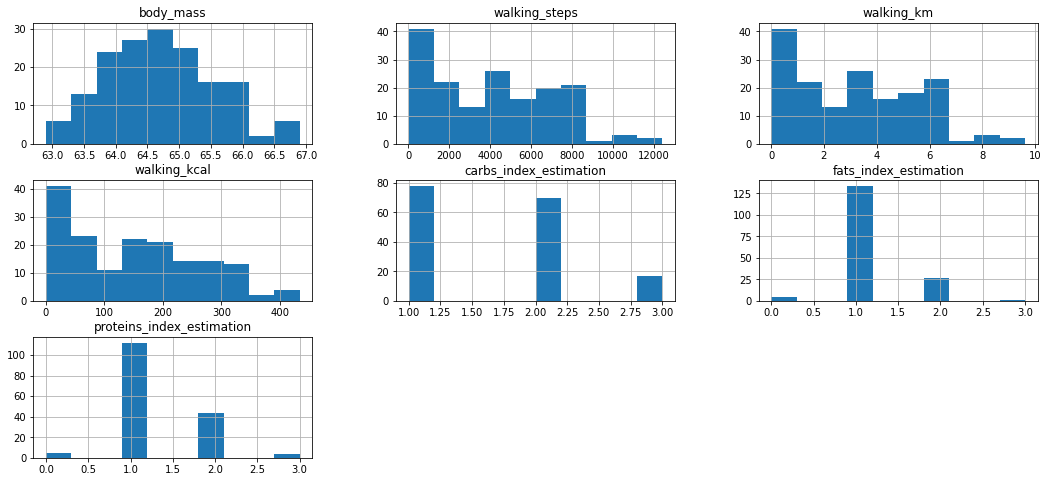

In [14]:
fig = plt.figure(figsize = (18,8))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

<b>It can be observed that the body mass feature could be approximated by a normal distribution! Let's check it with the normaltest function from the scipy module.</b>

<AxesSubplot:ylabel='Density'>

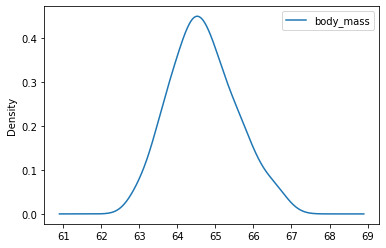

In [15]:
df[['body_mass']].plot(kind = 'density')

In [16]:
k2, p = stats.normaltest(df['body_mass'])
print("p = {:g}".format(p))
if p < 0.05:  # null hypothesis: body mass comes from a normal distribution
    print("The null hypothesis can be rejected, body mass doesn't come from a normal distribution!")
else:
    print("The null hypothesis cannot be rejected, body mass comes from a normal distribution!")

p = 0.240144
The null hypothesis cannot be rejected, body mass comes from a normal distribution!


In [17]:
# Calculation correlation matrix
corrmat = df.corr()
print(corrmat)

                           body_mass  walking_steps  walking_km  walking_kcal  \
body_mass                   1.000000       0.013438    0.009844     -0.020252   
walking_steps               0.013438       1.000000    0.999607      0.985633   
walking_km                  0.009844       0.999607    1.000000      0.984811   
walking_kcal               -0.020252       0.985633    0.984811      1.000000   
carbs_index_estimation      0.029345      -0.008975   -0.017115      0.018623   
fats_index_estimation      -0.009109       0.191570    0.186435      0.187317   
proteins_index_estimation  -0.080136       0.108619    0.108825      0.104855   

                           carbs_index_estimation  fats_index_estimation  \
body_mass                                0.029345              -0.009109   
walking_steps                           -0.008975               0.191570   
walking_km                              -0.017115               0.186435   
walking_kcal                             0.0186

<b>From the above graphics and correlation matrix, as expected, it can be observed there is a huge correlation (>0.98) between the features walking_steps, walking_km and walking_kcal. It means, just one of this features can be taken for further analysis and prediction model. The features walking_km and walking_kcal can be dropped out.</b>

In [18]:
df_clean = df.drop(["walking_km", "walking_kcal"], axis=1)

In [19]:
# Visual check dataframe for further analysis
df_clean.head()

,body_mass,walking_steps,carbs_index_estimation,fats_index_estimation,proteins_index_estimation
date,,,,,
2021-12-06,66.50,2560.0,3.0,1.0,1.0
2021-12-07,66.55,1069.0,3.0,1.0,1.0
2021-12-08,66.60,7193.0,1.0,2.0,1.0
2021-12-09,65.50,589.0,2.0,1.0,0.0
2021-12-10,64.70,7216.0,1.0,1.0,1.0


## Exploratory analysis

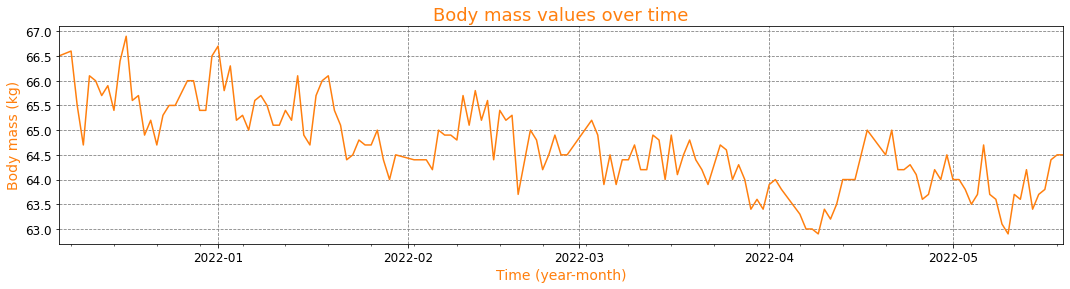

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

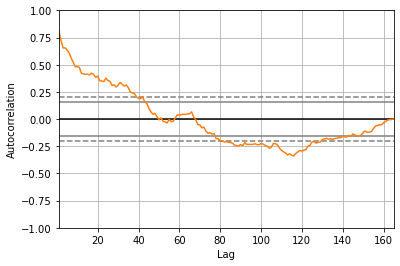

In [20]:
## Visualisation target variable body mass - time series and autocorrelation plot

create_figure(18, 4, "Body mass values over time", "Time (year-month)", "Body mass (kg)", "C1")
plt.xlim([df.index.min(), df.index.max()])
plt.plot(df['body_mass'], color="C1")
plt.show()

pd.plotting.autocorrelation_plot(df_clean['body_mass'], color="C1")

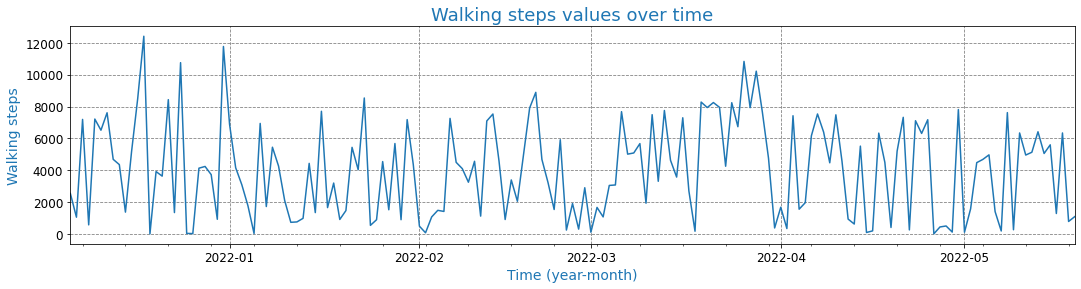

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

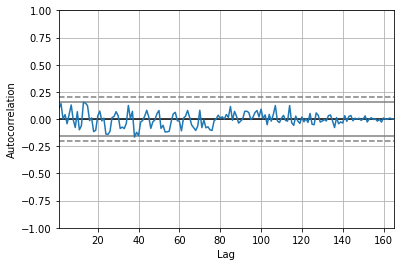

In [21]:
# Visual check of the feature walking steps

create_figure(18, 4, "Walking steps values over time", "Time (year-month)", "Walking steps", "C0")
plt.xlim([df.index.min(), df.index.max()])
plt.plot(df['walking_steps'], color="C0")
plt.show()

pd.plotting.autocorrelation_plot(df_clean['walking_steps'], color="C0")

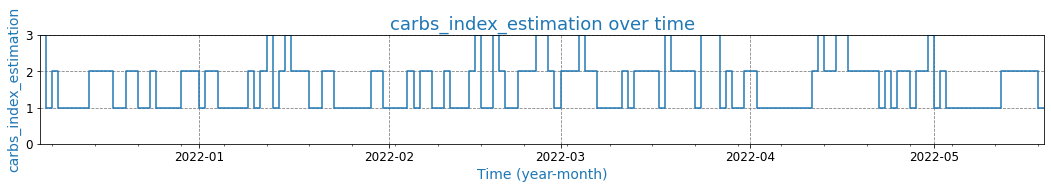

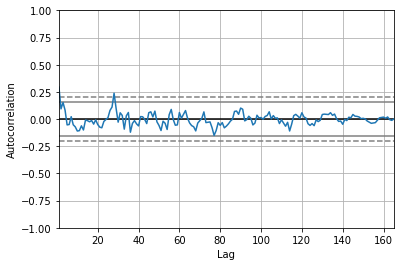

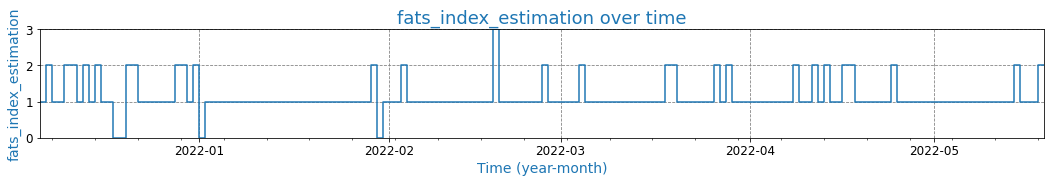

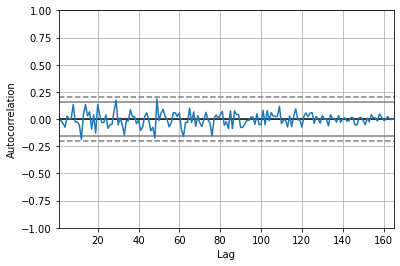

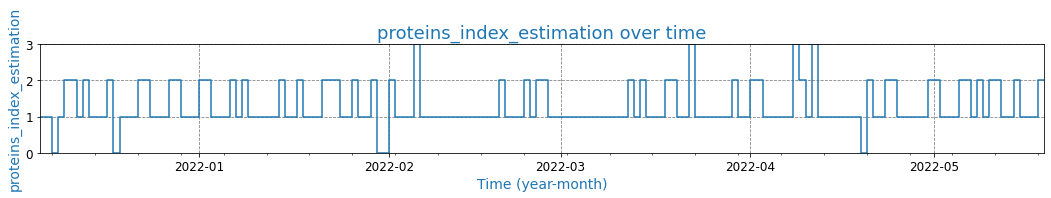

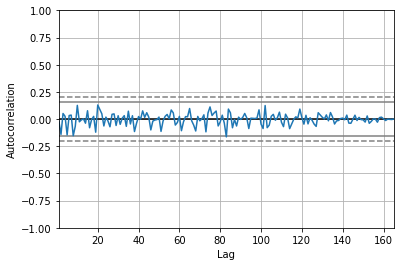

In [22]:
# Visual check of estimation indices

for column in df_clean.columns[2:]:
    title = f"{column} over time"
    ylabel = f"{column}"
    create_figure(18, 2, title, "Time (year-month)", ylabel, "C0")
    plt.xlim([df_clean.index.min(), df_clean.index.max()])
    plt.ylim([0, 3])
    plt.step(df_clean.index, df_clean[ylabel], color="C0")
    plt.show()
    pd.plotting.autocorrelation_plot(df_clean[ylabel], color="C0")

## Test stationarity

From the above graphics, it can be observed that the target variable <b>body mass</b> has a descending trend and a <b>positive autocorrelation higher than 0.5 for lags up to ca. 1 week (7 days)</b>.

However in order to be able to deploy further causality tests and model an autoregressive forecasting, the series have to be stationary. The linear regression models work the best if the predictors are not (auto)correlated against each other.

Therefore the series are being tested to stationarity and if needed, they will be made stationary before causality tests will be applied.

In [23]:
# Import statements for stationarity tests
from statsmodels.tsa.stattools import adfuller, kpss
import pmdarima as pm

<b>Augmented Dickey Fuller test</b><br>
Null hypothesis - series posseses a unit root and hence is not stationary.
Alternate hypothesis - series is stationary.

In [24]:
for column in df_clean.columns:
    test_adfuller = adfuller(df[column])
    p_value = test_adfuller[1]
    if p_value < 0.05:
        print(f"The series {column} IS stationary, p-value={p_value:.2f}")
    else:
        print(f"The series {column} ISN'T stationary, p-value={p_value:.2f}")

The series body_mass ISN'T stationary, p-value=0.13
The series walking_steps IS stationary, p-value=0.00
The series carbs_index_estimation IS stationary, p-value=0.00
The series fats_index_estimation IS stationary, p-value=0.00
The series proteins_index_estimation IS stationary, p-value=0.00


<b>The series body_mass has to be made stationary! It will be done through differencing the series.</b>

In [25]:
# Defining the order for differencing
differencing_order = pm.arima.ndiffs(df_clean['body_mass'], alpha=0.05, test='kpss')
print(f"The order for differencing the series body mass is {differencing_order}.")

The order for differencing the series body mass is 1.


In [26]:
# Stationarizing the series body_mass
body_mass_diff = df_clean['body_mass'].rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])

date
2021-12-06     NaN
2021-12-07    0.05
2021-12-08    0.05
2021-12-09   -1.10
2021-12-10   -0.80
              ... 
2022-05-15    0.30
2022-05-16    0.10
2022-05-17    0.60
2022-05-18    0.10
2022-05-19    0.00
Name: body_mass, Length: 165, dtype: float64


<AxesSubplot:xlabel='date'>

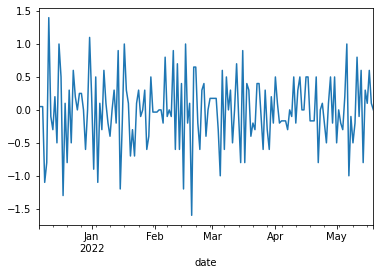

In [27]:
# Visual check body mass difference per day
print(body_mass_diff)
body_mass_diff.plot()

## Granger Causality Test

<b>Granger causality test will be used to determine, if one or more feature variables can be useful to forecast the target variable.</b><br>

Null hypothesis: the additional series doesn't Grange cause the target variable.<br><b>If p-values are smaller than a chosen significance level (for example 0.05) then the null hypothesis can be rejected and it can be concluded that the lag of X is useful in prediction of the target variable.</b>

In [28]:
# Adding column body mass difference to the dataframe
df_causality_test = df_clean.iloc[:, 1:]
df_causality_test.insert(0, 'body_mass_diff', body_mass_diff)

In [29]:
df_causality_test = df_causality_test.dropna() # drop first day of measurement, no difference can be made in this row

In [30]:
# Import statement
from statsmodels.tsa.stattools import grangercausalitytests

In [31]:
max_lags = 7 # max lag of 7 past days
y = 'body_mass_diff' # target variable
results_gct_dict = {} # dictionary for collecting results of Granger causality test

for column in df_causality_test.columns[1:]:
    results_gct_dict[column] = grangercausalitytests(df_causality_test[[y, column]], maxlag=max_lags)
    
#print(results_gct_dict)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5729  , p=0.2116  , df_denom=160, df_num=1
ssr based chi2 test:   chi2=1.6023  , p=0.2056  , df=1
likelihood ratio test: chi2=1.5945  , p=0.2067  , df=1
parameter F test:         F=1.5729  , p=0.2116  , df_denom=160, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6651  , p=0.1925  , df_denom=157, df_num=2
ssr based chi2 test:   chi2=3.4362  , p=0.1794  , df=2
likelihood ratio test: chi2=3.4003  , p=0.1827  , df=2
parameter F test:         F=1.6651  , p=0.1925  , df_denom=157, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7766  , p=0.0432  , df_denom=154, df_num=3
ssr based chi2 test:   chi2=8.7084  , p=0.0334  , df=3
likelihood ratio test: chi2=8.4810  , p=0.0370  , df=3
parameter F test:         F=2.7766  , p=0.0432  , df_denom=154, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0214  , p=0.0942  

In [32]:
# Finding p-values in collected results of Granger causality test
help_list = []

for key in results_gct_dict:
    p_values = [results_gct_dict[key][i+1][0]['ssr_ftest'][1] for i in range(max_lags)]
    print(f"The p-values for the feature {key} are:\n {p_values}\n ")
    help_list.append(p_values)

The p-values for the feature walking_steps are:
 [0.2116225357205809, 0.19250062208436128, 0.043235851203854495, 0.09423538826326534, 0.15922741702115395, 0.239870378237883, 0.3257220345864766]
 
The p-values for the feature carbs_index_estimation are:
 [0.06723404959453079, 0.1736945468803795, 0.003976511605423016, 0.0188849280150305, 0.025416856595390894, 0.01989707153275195, 0.0246473406214205]
 
The p-values for the feature fats_index_estimation are:
 [0.808306105803677, 0.26544500607625027, 0.09197807864298783, 0.07311073859190229, 0.09740495343164479, 0.12401113460051874, 0.0831781117729003]
 
The p-values for the feature proteins_index_estimation are:
 [0.5826096788690149, 0.7183992131185892, 0.6151315212177654, 0.18441571709747073, 0.08630298328080303, 0.12488966771820083, 0.16119320255286476]
 


In [33]:
# Organising p-values in a dataframe for better visualisation
help_array = np.array(help_list)
feature_index = df_causality_test.columns[1:]
lag_columns = [f"Lag {i}" for i in range(1, max_lags+1)]
df_pval_feature_lag = pd.DataFrame(help_array, index=feature_index, columns=lag_columns)

# Highlighting the feature with the highest significance level per lag (lowest p-value per lag)
df_pval_feature_lag.style.highlight_min(color = 'lightgreen', axis = 0)

,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7
walking_steps,0.211623,0.192501,0.043236,0.094235,0.159227,0.239870,0.325722
carbs_index_estimation,0.067234,0.173695,0.003977,0.018885,0.025417,0.019897,0.024647
fats_index_estimation,0.808306,0.265445,0.091978,0.073111,0.097405,0.124011,0.083178
proteins_index_estimation,0.582610,0.718399,0.615132,0.184416,0.086303,0.124890,0.161193


In [34]:
# Average p-value per variable
mean_pvalue_per_feature = df_pval_feature_lag.mean(axis=1)
print(mean_pvalue_per_feature)

#Average p-value per lag
mean_pvalue_per_lag = df_pval_feature_lag.mean(axis=0)
print(mean_pvalue_per_lag)

walking_steps                0.180916
carbs_index_estimation       0.047679
fats_index_estimation        0.220491
proteins_index_estimation    0.353277
dtype: float64
Lag 1    0.417443
Lag 2    0.337510
Lag 3    0.188580
Lag 4    0.092662
Lag 5    0.092088
Lag 6    0.127167
Lag 7    0.148685
dtype: float64


In [35]:
# Lag number at which the minimum of p-value for each feature was reached
lag_min_pvalue_per_feature = df_pval_feature_lag.idxmin(axis= 1)

<hr>
<b>Interpretation of results of Granger Causality Test</b><br>
From the table above, the lowest p-values (and also below 0.05) can be observed for the feature carbs_index_estimation, for all lags 1-7. <b>It means the past information about consumation of carbohydrates can be very useful in predictions of the body mass change, indeed!!! 🙂 🙂 . </b> Observing the lag 3 where the feature carbs_index_estimation has its minimum p-value, other useful feature with a p-value less than 0.05 for this lag is walking_steps.<br>
Observing the average p-values however (all variables included in the calculation), the smallest average p-value can ce observed for lag 5.<hr>
For this reason the Multivariate Vector Autoregression Models with following parameters will be built and compared depending on their performance:<br>

* <b>Params model_1: </b>var_order (max_lags) = 4, autopredictor target variable body_mass, additional predictor carbs_index_estimation

* <b>Params model_2: </b>var_order (max_lags) = 4, autopredictor target variable body_mass, additional predictors carbs_index_estimation and walking_steps

* <b>Params model_3: </b>var_order (max_lags) = 4, autopredictor target variable body_mass, additional predictors all other remaining variables<hr>

<b>In the VAR model, each variable is modeled as a linear combination of past values of itself and the past values of other variables in the system. The order of VAR defines the number of lags (past values) for each variable, which are included in modeling.</b>

## Multivariate Vector Autoregression (VAR)

<b>Multivariate Vector Autoregression model makes 1 forecast for the given future time period. In this case, the last 5% of data records will be used for validation of the forecasting models.</b><br>
<b>It means for each model 1 forecast for 9 days will be made respectively and validated with the test dataframes.</b>

In [36]:
#from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VAR

In [37]:
# Function for metrics calculation
# Root Mean Square Error (RMSE) - average distance between he predicted data values and the observed (actual) data values

def prediction_accuracy(prediction, actual):
    rmse = (((prediction - actual)**2).mean())**0.5  # RMSE
    return rmse

In [38]:
# Function for plotting predicted and actual values of the target variable body_mass

def comparison_figure(prediction, actual, date_index, title):
    plt.figure(figsize=(14, 4))
    plt.title(title)
    plt.xlabel('time', fontsize=12)
    plt.ylabel('body mass difference (kg)', fontsize=12)
    plt.plot(date_index, actual, color='C0', label='Actual')
    plt.plot(date_index, prediction, color='C1', label='Predicted')
    plt.grid()
    plt.legend()
    plt.show()

#### Model 1 -  with target variable and predictor carbs_index_estimation - var order 4

In [39]:
var_order_1 = 4

In [40]:
df_input_var_1 = df_causality_test[['body_mass_diff', 'carbs_index_estimation']]
df_input_var_1.head()

,body_mass_diff,carbs_index_estimation
date,,
2021-12-07,0.05,3.0
2021-12-08,0.05,1.0
2021-12-09,-1.10,2.0
2021-12-10,-0.80,1.0
2021-12-11,1.40,1.0


In [41]:
# Train and test data (the last 5% of data records will be used for validation of the model)
df_train_1 = df_input_var_1[ : int(0.95*(len(df_input_var_1)))]
df_test_1 = df_input_var_1[int(0.95*(len(df_input_var_1))) : ]

In [42]:
model_1 = VAR(endog=df_train_1, freq='1d')
model_1_fit = model_1.fit(var_order_1)
predictions_1 = model_1_fit.forecast(model_1_fit.endog, steps=len(df_test_1))

In [43]:
# Model validation
root_mean_square_error_1 = prediction_accuracy(predictions_1, df_test_1)
print(f"Root mean square error values (target body_mass_diff, add. predictor carbs_index_estimation):\n{root_mean_square_error_1}")

Root mean square error values (target body_mass_diff, add. predictor carbs_index_estimation):
body_mass_diff            0.430996
carbs_index_estimation    0.444824
dtype: float64


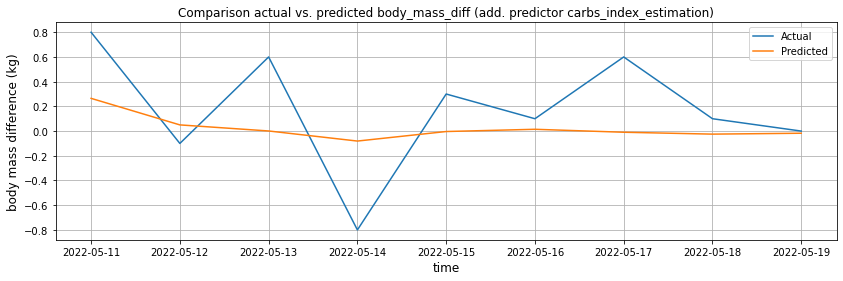

In [44]:
# Plotting predicted vs. actual values
predictions_for_plotting = np.array(predictions_1[:, 0])
actual_for_plotting = df_test_1['body_mass_diff']
date_index = df_test_1.index
title = "Comparison actual vs. predicted body_mass_diff (add. predictor carbs_index_estimation)"

comparison_figure(predictions_for_plotting, actual_for_plotting, date_index, title)

#### Model 2 - with target variable and predictors carbs_index_estimation and walking_steps - var order 4

In [45]:
var_order_2 = 4

In [46]:
df_input_var_2 = df_causality_test[['body_mass_diff', 'carbs_index_estimation', 'walking_steps']]
df_input_var_2.head()

,body_mass_diff,carbs_index_estimation,walking_steps
date,,,
2021-12-07,0.05,3.0,1069.0
2021-12-08,0.05,1.0,7193.0
2021-12-09,-1.10,2.0,589.0
2021-12-10,-0.80,1.0,7216.0
2021-12-11,1.40,1.0,6518.0


In [47]:
# Train and test data (the last 5% of data records will be used for validation of the model)
df_train_2 = df_input_var_2[ : int(0.95*(len(df_input_var_2)))]
df_test_2 = df_input_var_2[int(0.95*(len(df_input_var_2))) : ]

In [48]:
model_2 = VAR(endog=df_train_2, freq='1d')
model_2_fit = model_2.fit(var_order_2)
predictions_2 = model_2_fit.forecast(model_2_fit.endog, steps=len(df_test_2))

In [49]:
# Model validation
root_mean_square_error_2 = prediction_accuracy(predictions_2, df_test_2)

print(f"""Root mean square error values (target body_mass_diff, 
add. predictor carbs_index_estimation and walking_steps):\n{root_mean_square_error_2}""")

Root mean square error values (target body_mass_diff, 
add. predictor carbs_index_estimation and walking_steps):
body_mass_diff               0.376870
carbs_index_estimation       0.449088
walking_steps             2217.318134
dtype: float64


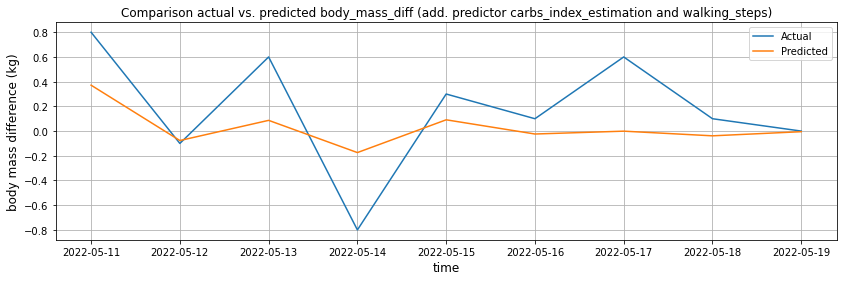

In [50]:
predictions_for_plotting = np.array(predictions_2[:, 0])
actual_for_plotting = df_test_2['body_mass_diff']
date_index = df_test_2.index
title = "Comparison actual vs. predicted body_mass_diff (add. predictor carbs_index_estimation and walking_steps)"
comparison_figure(predictions_for_plotting, actual_for_plotting, date_index, title)

#### Model 3 - with the target variable and all remaining predictor variables - var oder 4

In [51]:
var_order_3 = 4
df_input_var_3 = df_causality_test
df_input_var_3.head()

,body_mass_diff,walking_steps,carbs_index_estimation,fats_index_estimation,proteins_index_estimation
date,,,,,
2021-12-07,0.05,1069.0,3.0,1.0,1.0
2021-12-08,0.05,7193.0,1.0,2.0,1.0
2021-12-09,-1.10,589.0,2.0,1.0,0.0
2021-12-10,-0.80,7216.0,1.0,1.0,1.0
2021-12-11,1.40,6518.0,1.0,2.0,2.0


In [52]:
# Train and test data (the last 5% of data records will be used for validation of the model)
df_train_3 = df_input_var_3[ : int(0.95*(len(df_input_var_3)))]
df_test_3 = df_input_var_3[int(0.95*(len(df_input_var_3))) : ]

In [53]:
model_3 = VAR(endog=df_train_3, freq='1d')
model_3_fit = model_3.fit(var_order_3)
predictions_3 = model_3_fit.forecast(model_3_fit.endog, steps=len(df_test_3))

In [54]:
# Model validation
root_mean_square_error_3 = prediction_accuracy(predictions_3, df_test_3)

print(f"Root mean square error values (target body_mass_diff, all variables as predictors):\n{root_mean_square_error_3}")

Root mean square error values (target body_mass_diff, all variables as predictors):
body_mass_diff                  0.350726
walking_steps                2218.321169
carbs_index_estimation          0.446690
fats_index_estimation           0.451828
proteins_index_estimation       0.483487
dtype: float64


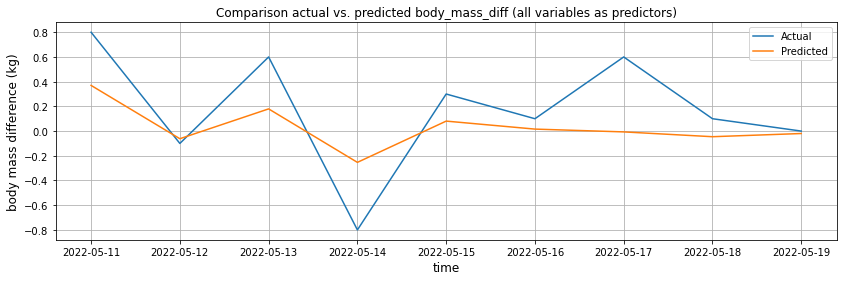

In [55]:
predictions_for_plotting = np.array(predictions_3[:, 0])
actual_for_plotting = df_test_3['body_mass_diff']
date_index = df_test_3.index
title = "Comparison actual vs. predicted body_mass_diff (all variables as predictors)"
comparison_figure(predictions_for_plotting, actual_for_plotting, date_index, title)

## Interpretation of modeling results

From the above results, it can be seen that the model 3 (taking into account 4 preceding values of target variable body_mass difference as well as all other remaining variables) performs the best - the Root Mean Square Error for the target variable body_mass_diff is the lowest comapring to the other models (model 1 and model 2). RMSE e.g. average distance between the predicted data values and the observed (actual) data values comes to 351g.

<b>Therefore the model 3 will be used for future predictions of body mass, based on body mass past values as well as past values of walking activity and nutrition habits.</b><hr>Moreover according to the results of Granger causality test, that the past values of carbs ingestion and walking activity are highly correlated with the 3-day-delayed values of body mass difference, I'll try to reduce the amonut of carbs and increase the walking activity as much as this will be possible. 🙂 🙂